<a href="https://colab.research.google.com/github/mai968/Project_DM/blob/master/PreprocessingData_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert csv -> arff

In [1]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=bd36ce9cea9949eaa8b9b8684d9ddcc836beb29bcc2d2fce47389d73be91bcc4
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
!pip install pandas liac-arff


In [4]:
import pandas as pd
import arff

# Đọc dữ liệu từ file CSV
data = pd.read_csv('cleaned_data_Num.csv')

# Chuẩn bị dữ liệu cho file ARFF
arff_data = {
    'description': '',
    'relation': 'dataset',
    'attributes': [(col, 'NUMERIC') for col in data.columns],  # Giả sử tất cả cột là kiểu số
    'data': data.values.tolist()  # Chuyển DataFrame thành danh sách để tương thích với ARFF
}

# Ghi file ARFF
with open('cleaned_data.arff', 'w') as f:
    arff.dump(arff_data, f)


# Preprocessing dataset

In [ ]:
import pandas as pd
import numpy as np
# import arff

# Load the dataset to inspect its structure
file_path = 'auto-mpg.csv'
data = pd.read_csv(file_path)

# Display the first few rows and some basic info about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(None,
     mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
 0  18.0          8         307.0      130.0  3504.0          12.0          70   
 1  15.0          8         350.0      165.0  3693.0          11.5          70   
 2  18.0          8         318.0      150.0  3436.0          11.0          70   
 3  16.0          8         304.0      150.0  3433.0          12.0          70   
 4  17.0          8         302.0      140.0  3449.0          10.5          70   
 
    origin                   car_name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  )

## **Data Cleaning**


In [ ]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**Correct Inconsistencies:**
Check for inconsistent data entries and correct them (e.g., standardizing text formats).

In [ ]:
# Step 1: Data Cleaning
# Convert 'horsepower' to numeric, coerce errors, and check for missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


**Handle Missing Values:**
Decide on appropriate methods to handle missing data (e.g., removal, mean/mode/median imputation, forward/backward fill).

In [ ]:
# Display the positions of missing values
missing_positions = df[df.isnull().any(axis=1)].isnull()

# Show the row and column indices with missing values
missing_positions = missing_positions[missing_positions.any(axis=1)]
missing_indices = missing_positions[missing_positions == True].stack().index.tolist()

print("Positions of missing values (row, column):")
for index in missing_indices:
    print(index)

Positions of missing values (row, column):
(32, 'horsepower')
(126, 'horsepower')
(330, 'horsepower')
(336, 'horsepower')
(354, 'horsepower')
(374, 'horsepower')


In [ ]:
# Calculate the total number of missing values
total_missing = len(missing_indices)

# Calculate the total number of entries (rows) in the dataset
total_entries = 398

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_entries) * 100

print(f"Percentage of missing values: {missing_percentage}%")


Percentage of missing values: 1.507537688442211%


Nếu dữ liệu của bạn không có ngoại lệ lớn và là biến số liên tục, hãy xem xét sử dụng mean.

Nếu dữ liệu có ngoại lệ hoặc không phân phối chuẩn, hãy chọn median.

Nếu bạn đang làm việc với biến phân loại, hãy sử dụng mode.

mean ~ median => phân phối chuẩn

mean =! median => ko chuẩn

In [ ]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [ ]:
# Step 2: Handle Missing Values by Dropping Rows with Missing Data
# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify that there are no more missing values
df_cleaned.info()

print("Preprocessing complete.")


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
Preprocessing complete.


In [ ]:
print(df_cleaned)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

In [ ]:
df1 = df_cleaned.copy()
# df1

Check Duplicate

In [ ]:
import pandas as pd

# Check for duplicates
duplicates = df1[df1.duplicated()]

# Output the duplicates
if not duplicates.empty:
    print("Found duplicates:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


**Outlier Detection and Treatment:**
Identify outliers that might impact analysis, and either remove or transform them as needed.

Step 1: Outlier Detection using IQR
The Interquartile Range (IQR) method is commonly used to detect outliers. For each numeric column, data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Identify Outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    outlier_percentages = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Select numeric columns only
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Add index list of outliers to dictionary
        outliers[col] = outlier_rows.index.tolist()

        # Calculate the percentage of outliers compared to the total number of rows
        outlier_percentage = (len(outlier_rows) / len(df)) * 100
        outlier_percentages[col] = outlier_percentage

    return outliers, outlier_percentages

outliers, outlier_percentages = detect_outliers_iqr(df1)

# Display outlier positions by column
print("Outliers detected by column:")
for col, indices in outliers.items():
    print(f"{col}: {indices}")

Outliers detected by column:
mpg: []
cylinders: []
displacement: []
horsepower: [6, 7, 8, 13, 25, 27, 67, 94, 95, 116]
weight: []
acceleration: [7, 9, 11, 59, 195, 196, 209, 299, 300, 326, 394]
model_year: []
origin: []


In [ ]:
# Showing results for 'horsepower'
column = 'horsepower'
num_outliers_horsepower = len(outliers.get(column, []))
outlier_percentage_horsepower = outlier_percentages.get(column, 0)

print(f"Number of outliers in {column}: {num_outliers_horsepower}")
print(f"Percentage of outliers in {column}: {outlier_percentage_horsepower:.2f}%")


Number of outliers in horsepower: 10
Percentage of outliers in horsepower: 2.55%


In [ ]:
# Showing results for 'acceleration'
column = 'acceleration'
num_outliers_acceleration = len(outliers.get(column, []))
outlier_percentage_acceleration = outlier_percentages.get(column, 0)

print(f"Number of outliers in {column}: {num_outliers_acceleration}")
print(f"Percentage of outliers in {column}: {outlier_percentage_acceleration:.2f}%")


Number of outliers in acceleration: 11
Percentage of outliers in acceleration: 2.81%


In [ ]:
import pandas as pd
import numpy as np


# Identify and remove outliers in all columns using IQR method
def remove_outliers_iqr(df):
    # Create an initial mask that is True for all rows
    mask = np.ones(len(df), dtype=bool)

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update mask for lines containing outliers (outliers = False)
        mask = mask & (df[col] >= lower_bound) & (df[col] <= upper_bound)

    # Filter non-outlier rows based on mask
    df_clean = df[mask]
    return df_clean

# Remove outliers from df1
df1_clean1 = remove_outliers_iqr(df1)

print(df1_clean1)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0  2950.0          17.3   
393  27.0          4         140.0        86.0  2790.0          15.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

In [ ]:
df_after_handle_outlier = df1_clean1.copy()
df2 = df_after_handle_outlier.copy()
print(df2)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0  2950.0          17.3   
393  27.0          4         140.0        86.0  2790.0          15.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

**Feature Engineering**

**Feature Selection:**
Feature selection is the process of identifying and choosing the most important features that significantly contribute to predicting the target variable. The goal is to reduce the number of features by eliminating irrelevant or redundant ones, which can lead to more efficient models with better generalization, faster training times, and reduced risk of overfitting.


In [ ]:
# Step 2: Feature Engineering
# Drop 'car_name' as it may not contribute directly to the analysis
df2 = df2.drop(columns=['car_name'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           372 non-null    float64
 1   cylinders     372 non-null    int64  
 2   displacement  372 non-null    float64
 3   horsepower    372 non-null    float64
 4   weight        372 non-null    float64
 5   acceleration  372 non-null    float64
 6   model_year    372 non-null    int64  
 7   origin        372 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


In [ ]:
correlation_matrix = df2.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.773752     -0.807124   -0.791483 -0.832137   
cylinders    -0.773752   1.000000      0.955883    0.857902  0.898313   
displacement -0.807124   0.955883      1.000000    0.888231  0.940350   
horsepower   -0.791483   0.857902      0.888231    1.000000  0.882085   
weight       -0.832137   0.898313      0.940350    0.882085  1.000000   
acceleration  0.375479  -0.474818     -0.489523   -0.652216 -0.382518   
model_year    0.552155  -0.305033     -0.315537   -0.354527 -0.268218   
origin        0.563733  -0.561826     -0.622121   -0.464135 -0.586258   

              acceleration  model_year    origin  
mpg               0.375479    0.552155  0.563733  
cylinders        -0.474818   -0.305033 -0.561826  
displacement     -0.489523   -0.315537 -0.622121  
horsepower       -0.652216   -0.354527 -0.464135  
weight           -0.382518   -0.268218 -0.586258  
acceleration      1.000000    0.2257

## Choose mpg for predict

In [ ]:
import statsmodels.api as sm

# Select dependent variable (y) and independent variable (X)
y = df2['mpg']  # Example select mpg as dependent variable
X = df2.drop('mpg', axis=1) # The remaining variables are independent variables

# Add a column 1 to X to calculate the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print summary results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     240.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          2.23e-132
Time:                        09:06:16   Log-Likelihood:                -962.00
No. Observations:                 372   AIC:                             1940.
Df Residuals:                     364   BIC:                             1971.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.5317      4.731     -2.649   

Drop acceleration    

In [ ]:
import statsmodels.api as sm

# Remove column 'acceleration' because p-value > 0.05
df2 = df2.drop('acceleration', axis=1)
print(df2)

# Select dependent variable (y) and independent variable (X)
y = df2['mpg']  # Example select mpg as dependent variable
X = df2.drop('mpg', axis=1)   # The remaining variables are independent variables

# Add a column 1 to X to calculate the intercept
X = sm.add_constant(X)

# Run OLS regression again after removing the 'acceleration' column
model = sm.OLS(y, X).fit()

print(model.summary())


      mpg  cylinders  displacement  horsepower  weight  model_year  origin
0    18.0          8         307.0       130.0  3504.0          70       1
1    15.0          8         350.0       165.0  3693.0          70       1
2    18.0          8         318.0       150.0  3436.0          70       1
3    16.0          8         304.0       150.0  3433.0          70       1
4    17.0          8         302.0       140.0  3449.0          70       1
..    ...        ...           ...         ...     ...         ...     ...
392  27.0          4         151.0        90.0  2950.0          82       1
393  27.0          4         140.0        86.0  2790.0          82       1
395  32.0          4         135.0        84.0  2295.0          82       1
396  28.0          4         120.0        79.0  2625.0          82       1
397  31.0          4         119.0        82.0  2720.0          82       1

[372 rows x 7 columns]
                            OLS Regression Results                          

Drop cylinders

In [ ]:
import statsmodels.api as sm

# Remove column 'cylinders' because p-value > 0.05
df2 = df2.drop('cylinders', axis=1)

# Select dependent variable (y) and independent variable (X)
y = df2['mpg']  # Example select mpg as dependent variable
X = df2.drop('mpg', axis=1) # The remaining variables are independent variables

# Add a column 1 to X to calculate the intercept
X = sm.add_constant(X)

# Run OLS regression again after removing the 'cylinders' column
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     337.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          1.09e-134
Time:                        09:23:24   Log-Likelihood:                -962.52
No. Observations:                 372   AIC:                             1937.
Df Residuals:                     366   BIC:                             1961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.6047      4.070     -3.588   

Drop displacement     

In [ ]:
import statsmodels.api as sm

# Remove column 'displacement' because p-value > 0.05
df2 = df2.drop('displacement', axis=1)

# Select dependent variable (y) and independent variable (X)
y = df2['mpg']  # Example select mpg as dependent variable
X = df2.drop('mpg', axis=1)  # The remaining variables are independent variables

# Add a column 1 to X to calculate the intercept
X = sm.add_constant(X)

# Run OLS regression again after removing the 'displacement' column
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     418.5
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          2.73e-135
Time:                        09:31:00   Log-Likelihood:                -964.25
No. Observations:                 372   AIC:                             1938.
Df Residuals:                     367   BIC:                             1958.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7600      4.082     -3.615      0.0

In [ ]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 397
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         372 non-null    float64
 1   horsepower  372 non-null    float64
 2   weight      372 non-null    float64
 3   model_year  372 non-null    int64  
 4   origin      372 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 17.4 KB


**Convert data from continuous to discrete form**

In [ ]:
df3

,mpg,horsepower,weight,model_year,origin
0,18.0,130.0,3504.0,70,1
1,15.0,165.0,3693.0,70,1
2,18.0,150.0,3436.0,70,1
3,16.0,150.0,3433.0,70,1
4,17.0,140.0,3449.0,70,1
...,...,...,...,...,...
392,27.0,90.0,2950.0,82,1
393,27.0,86.0,2790.0,82,1
395,32.0,84.0,2295.0,82,1
396,28.0,79.0,2625.0,82,1



## Process the dataset after clean data into 2 subsets: 10% & 90%

In [ ]:
import pandas as pd

data = pd.read_csv('cleaned_data_Num.csv')

# Random data shuffling
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # frac=1 to shuffle everything, random_state to reproduce the result

# Calculate the number of elements for each subset
split_index = int(len(data) * 0.1)  # 10% of total elements

# Tạo 2 subset
subset_10 = data.iloc[:split_index]  # Top 10%
subset_90 = data.iloc[split_index:]  # The remaining 90%

print("Bộ dữ liệu 10%:")
print(subset_10)
print("\n Bộ dữ liệu 90%:")
print(subset_90)

# Check number of elements
print("\nSố phần tử trong bộ 10%:", len(subset_10))
print("Số phần tử trong bộ 90%:", len(subset_90))

subset_10.to_csv('Num10.csv', index=False)
subset_90.to_csv('Num90.csv', index=False)


Bộ dữ liệu 10%:
    horsepower  weight  model_year  origin   mpg
0           90    2556          79       1  33.5
1          153    4129          72       1  14.0
2          140    4294          72       1  13.0
3           70    2120          80       1  32.1
4          130    4295          77       1  15.0
5           92    2585          82       1  26.0
6          120    3820          76       2  16.5
7          100    2634          71       1  19.0
8           74    2635          81       3  31.6
9           95    3264          75       1  19.0
10          67    1963          74       2  26.0
11         140    4638          74       1  14.0
12          95    3155          78       1  20.5
13         145    4440          75       1  15.0
14         105    3380          78       1  20.6
15          84    2525          82       1  29.0
16         193    4732          70       1   9.0
17          90    2265          73       2  26.0
18          78    2188          80       2  34.3
19  

Tách bộ data Num90 -> 2 phần: 20% và 80%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = 'Num90.csv'
data = pd.read_csv(file_path)

# Split the data into 20% and 80% of the 90% set
data_20_90, data_80_90 = train_test_split(data, test_size=0.8, random_state=42)

# Save the data sets to CSV file
data_20_90.to_csv('data_20_of_90.csv', index=False)
data_80_90.to_csv('data_80_of_90.csv', index=False)

print("Tách dữ liệu thành công!")
print(f"Số dòng trong tập 20% của 90%: {len(data_20_90)}")
print(f"Số dòng trong tập 80% của 90%: {len(data_80_90)}")


Tách dữ liệu thành công!
Số dòng trong tập 20% của 90%: 67
Số dòng trong tập 80% của 90%: 268


In [ ]:
from scipy.io import arff
import pandas as pd

# Giả sử df là DataFrame đã làm sạch
df = pd.read_csv('.csv')  # Đọc dữ liệu từ CSV (hoặc sử dụng df của bạn)

# Lấy tên cột và các giá trị trong DataFrame
attributes = [(col, 'Numeric') if df[col].dtype in ['float64', 'int64'] else (col, 'String') for col in df.columns]

# Chuyển dữ liệu của DataFrame thành một list
data = df.values.tolist()

# Ghi dữ liệu vào file ARFF
with open('.arff', 'w') as f:
    # Định nghĩa header ARFF
    f.write('@RELATION auto-mpg\n')
    for attribute in attributes:
        f.write(f'@ATTRIBUTE {attribute[0]} {attribute[1]}\n')

    f.write('@DATA\n')
    for row in data:
        f.write(','.join(map(str, row)) + '\n')

print("ARFF file saved successfully!")


ARFF file saved successfully!


In [ ]:
df = pd.read_csv('cleaned_data_Num.csv')  # Đọc dữ liệu từ CSV (hoặc sử dụng df của bạn)

df.corr()

,horsepower,weight,model_year,origin,mpg
horsepower,1.000000,0.882085,-0.354527,-0.464135,-0.791483
weight,0.882085,1.000000,-0.268218,-0.586258,-0.832137
model_year,-0.354527,-0.268218,1.000000,0.156953,0.552155
origin,-0.464135,-0.586258,0.156953,1.000000,0.563733
mpg,-0.791483,-0.832137,0.552155,0.563733,1.000000


## Data Analysis



*   Histogram Distribution
*   Boxplot Distribution



In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('cleaned_data_Num.csv')
df

,horsepower,weight,model_year,origin,mpg
0,193,4732,70,1,9.0
1,200,4376,70,1,10.0
2,150,4997,73,1,11.0
3,180,3664,73,1,11.0
4,180,4955,71,1,12.0
...,...,...,...,...,...
367,76,2144,80,2,41.5
368,48,1985,78,2,43.1
369,48,2085,80,2,44.3
370,67,1850,80,3,44.6


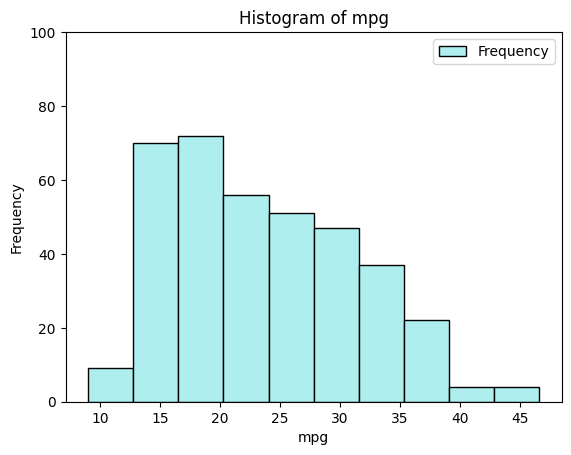

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['mpg'], bins=10, color="paleturquoise", edgecolor="black", label="Frequency")

plt.xlabel("mpg")
plt.ylabel("Frequency")
plt.title("Histogram of mpg")
plt.ylim(0, 100)
plt.legend()
plt.show()

<ipython-input-14-9954ba04d480>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="model_year", y="mpg", data=df, palette=palette)
<ipython-input-14-9954ba04d480>:9: UserWarning: 
The palette list has fewer values (5) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="model_year", y="mpg", data=df, palette=palette)


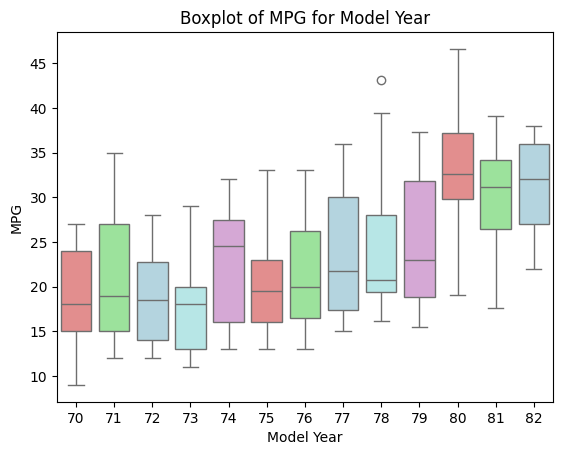

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

palette = sns.color_palette(["lightcoral", "lightgreen", "lightblue", "paleturquoise", "plum"])
sns.boxplot(x="model_year", y="mpg", data=df, palette=palette)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("Boxplot of MPG for Model Year")
plt.show()

<ipython-input-21-ac88b23a5788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="mpg", data=df, palette=["lightcoral", "lightgreen", "lightblue"])


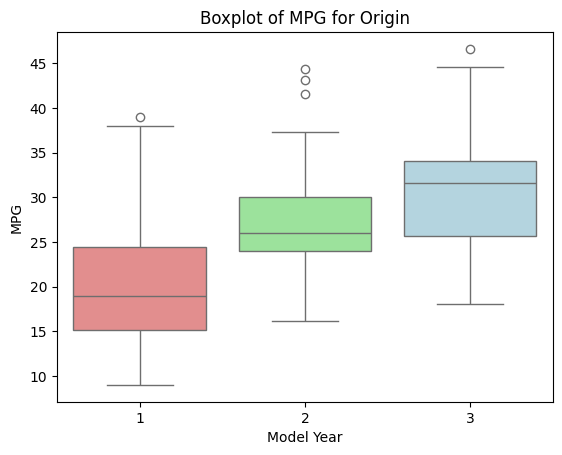

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.boxplot(x="origin", y="mpg", data=df, palette=["lightcoral", "lightgreen", "lightblue"])
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("Boxplot of MPG for Origin")
plt.show()

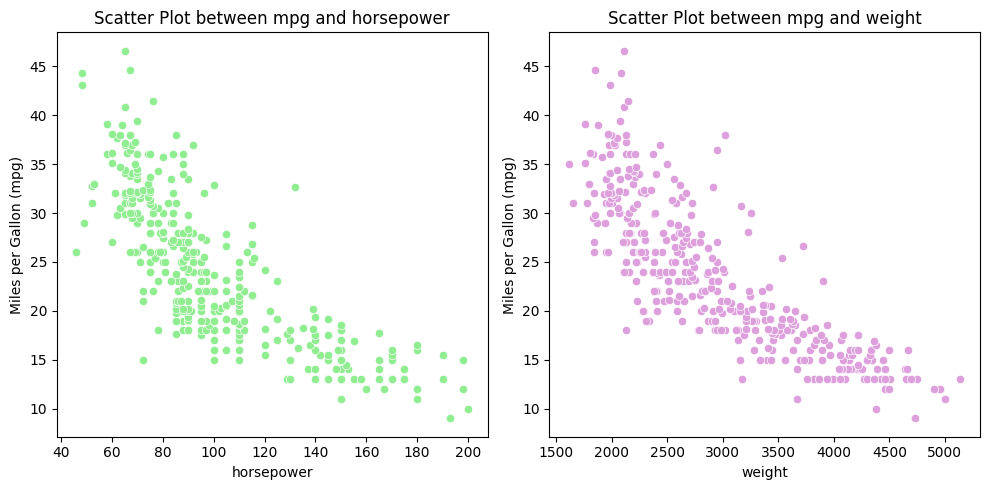

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

independent_vars = ['horsepower', 'weight']
colors = ["lightgreen", "plum"]
plt.figure(figsize=(10, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=df[var], y=df['mpg'], color=colors[i])
    plt.title(f'Scatter Plot between mpg and {var}')
    plt.xlabel(var)
    plt.ylabel('Miles per Gallon (mpg)')
plt.tight_layout()
plt.show()

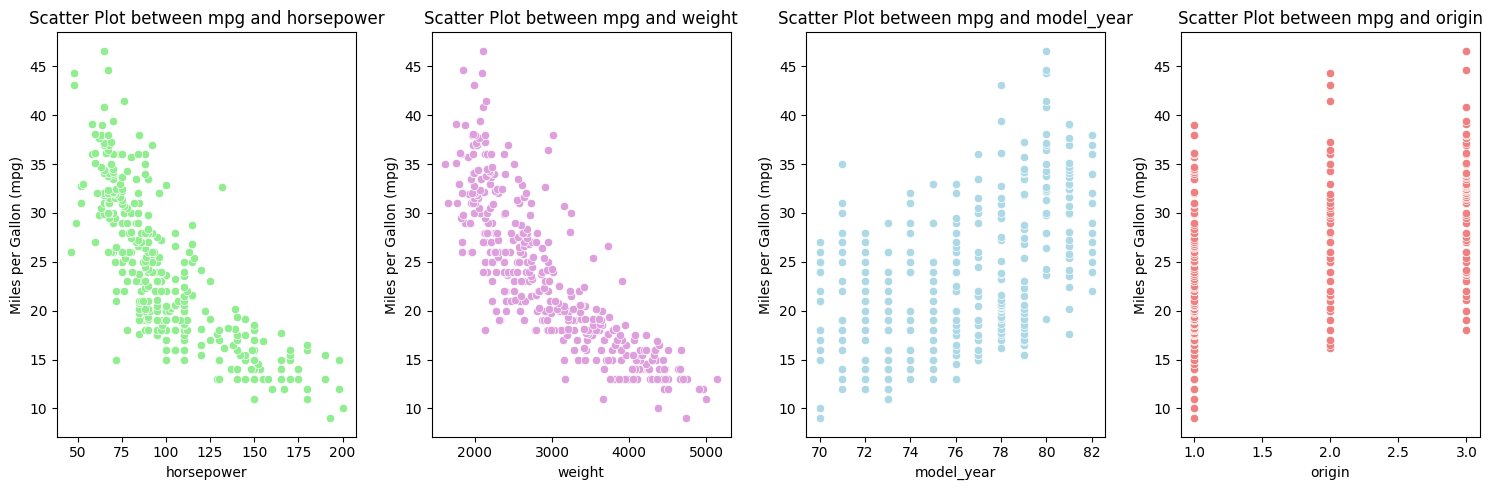

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into a DataFrame
# data = pd.read_csv('clean_data.csv')

# List of independent variables to plot
independent_vars = ['horsepower', 'weight', 'model_year', 'origin']

colors = ["lightgreen", "plum", "lightblue", "lightcoral"]

# Create scatter plots for each independent variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=df[var], y=df['mpg'], color=colors[i])
    plt.title(f'Scatter Plot between mpg and {var}')
    plt.xlabel(var)
    plt.ylabel('Miles per Gallon (mpg)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

df = pd.read_csv("cleaned_data_Num.csv")

# Chi-Squared Test
contingency_table = pd.crosstab(df['mpg'], df['origin'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("There is a significant dependency between mpg and origin.\n")
else:
    print("There is no significant dependency between mpg and origin.\n")



Chi-Squared Test Results:
Chi2 Value: 376.89544984661086
P-value: 2.3449744477569078e-07
There is a significant dependency between mpg and origin.



In [ ]:
from scipy.stats import chi2_contingency

df = pd.read_csv("cleaned_data.csv")

# Create contingency table
contingency_table = pd.crosstab(df['mpg'], df['origin'])
print(contingency_table)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")


origin  Asia  Europe  NorthAmerican
mpg                                
High      40      11             16
Low        9      13            159
Medium    30      39             55
Chi-squared: 136.88455435104234, p-value: 1.3107523581492288e-28
